In [22]:
#import folder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../zscore.csv')

df


,close,volume,normal_return,log_return,7d_rolling_mean,7d_rolling_volatility,30d_rolling_mean,30d_rolling_volatility,7d_zscore,30d_zscore,30d_zscore_return,30d_zscore_logreturn,volume_change_%,7d_zscore_volume_change,30d_zscore_volume_change
0,105857.99,13453.98813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105376.89,13259.52634,-0.454477,-0.004555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.445384,NaN,NaN
2,104696.86,14034.89482,-0.645331,-0.006474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.847633,NaN,NaN
3,101508.68,22321.50154,-3.045153,-0.030925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.042884,NaN,NaN
4,104288.44,15839.07385,2.738446,0.027016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.041181,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,111262.01,13392.60875,-0.448457,-0.004495,113072.120000,2.340340,115929.268667,1.821406,-0.751778,-1.616247,-0.125755,-0.117161,-27.420928,-0.611986,-0.712391
85,112566.90,11104.27744,1.172808,0.011660,113081.677143,2.335323,115746.088000,1.830150,-0.214022,-1.088079,0.718710,0.722643,-17.086524,-0.491395,-0.488138
86,108377.40,22580.31045,-3.721787,-0.037928,111859.021429,1.962968,115426.976000,1.943195,-1.518979,-2.214210,-1.779717,-1.800757,103.347859,1.505973,1.559643
87,108816.33,10708.39159,0.405001,0.004042,110913.061429,2.033951,115126.177000,1.946826,-1.102362,-1.873010,0.334816,0.342876,-52.576420,-1.067892,-1.079762


In [19]:
#data checking
df.describe()




,Unnamed: 0,close,7d_rolling_volatility,7d_zscore,30d_rolling_volatility,30d_zscore
count,89.000000,89.000000,82.000000,83.000000,59.000000,60.000000
mean,44.000000,112177.061685,1.594051,0.022155,1.508746,0.384723
std,25.836021,5626.190854,0.516056,1.095125,0.191769,1.361054
min,0.000000,100963.870000,0.752257,-1.998911,1.216220,-2.328088
25%,22.000000,107146.500000,1.105607,-0.893054,1.395178,-0.537070
50%,44.000000,112546.350000,1.496557,-0.069411,1.468757,0.694569
75%,66.000000,117472.010000,2.057158,0.993168,1.594503,1.263005
max,88.000000,123306.430000,2.493595,2.096077,1.946826,3.115192


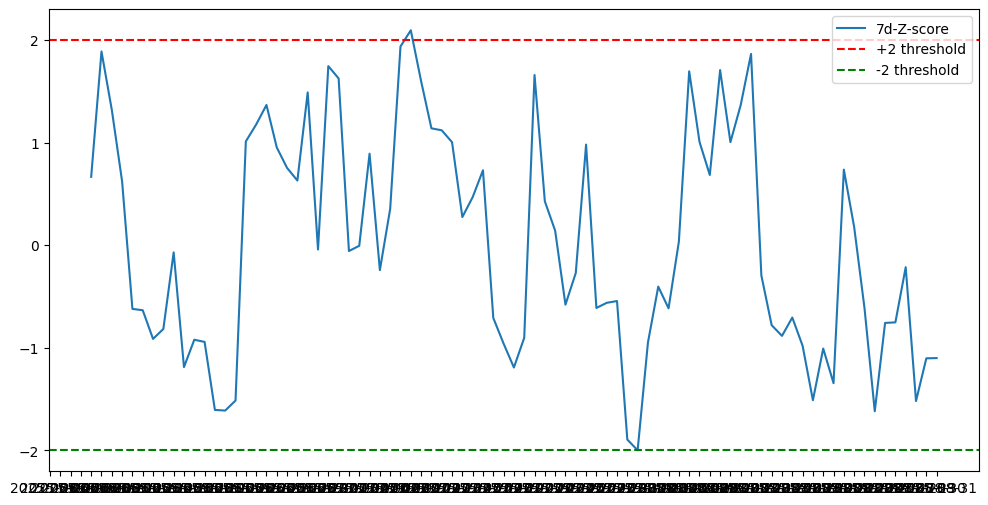

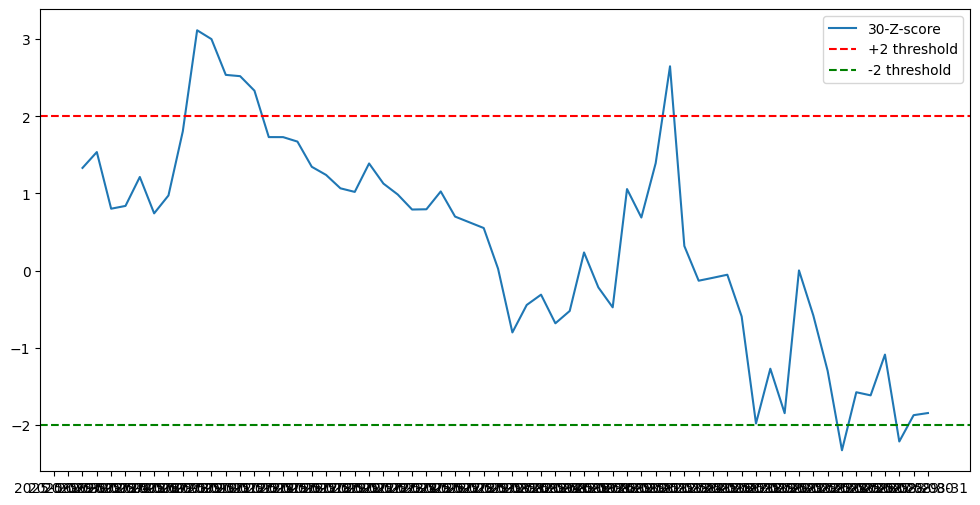

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["7d_zscore"], label="7d-Z-score")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()



plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["30d_zscore"], label="30-Z-score")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


In [21]:
#identify outlier
outliers = df[(df["7d_zscore"] > 2) | (df["7d_zscore"] < -2)]
print(outliers[["open_time", "close", "7d_zscore"]])


outliers = df[(df["30d_zscore"] > 2) | (df["30d_zscore"] < -2)]
print(outliers[["open_time", "close", "30d_zscore"]])



     open_time     close  7d_zscore
37  2025-07-10  116010.0   2.096077
     open_time      close  30d_zscore
37  2025-07-10  116010.00    3.115192
38  2025-07-11  117527.66    3.000677
39  2025-07-12  117420.00    2.537114
40  2025-07-13  119086.64    2.520527
41  2025-07-14  119841.18    2.332285
70  2025-08-13  123306.43    2.648471
82  2025-08-25  110111.98   -2.328088
86  2025-08-29  108377.40   -2.214210
